This jupyter notebook provides the code stumps for the exam questions.

## Question 1: Profit Optimization for Hotel Room Sales

In [10]:
price = [50, 40, 30]

In [1]:
#demandfunction D(p)

def demand(p): 
    return (1000-2.2*p,0)
    

In [2]:
# Revenue function 
def revenue(p):
    d = demand(d)
    return p * d

In [12]:
#Total cost function 
def total_cost(p): 
    d = demand(d)
    cost = 0 
    fee = 0
    if d <= 60: 
        cost = 50 * d 
    elif d<=150: 
        cost = (d-60)*40 + 50*60
    elif d>150:
        cost = (d-150)*30 + 50*60 + 40*(150-60)
    elif d>200: #only 200 rooms 
        cost = 0 
    if d> 100: 
        fee = 20000
    else: 
        fee = 0
    return cost + fee

In [11]:
#Profit function 
def profit(p): 
        return revenue(p)-total_cost(p) 


In [7]:
prices = [50, 40, 30]
demand = [60, 90, 150]

def revenue (p,d):
    revenue = 0  
    for p,d in zip(prices, demand): 
        revenue = revenue + p*d
    return revenue

revenue = revenue(prices, demand)
revenue

11100

## Question 2: Hotel Reservation Management

## Question 3

The dataset is provided in the `data.csv` file.

## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

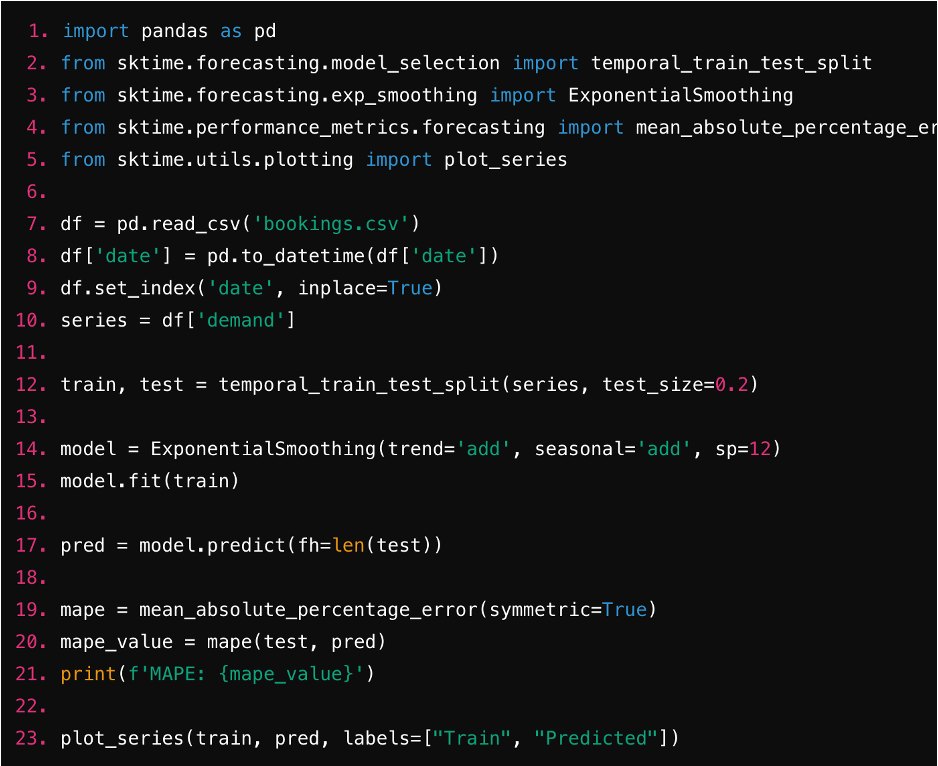

## Question 5

In [12]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1